In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
dataset1 = pd.read_csv('/content/amazon.csv',encoding="ISO-8859-1")

In [ ]:
dataset1

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


# Converting Date Column dtype

In [ ]:
dataset1['date'] = pd.to_datetime(dataset1['date'])
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


#Top 5 Rows of The Dataset

In [ ]:
dataset1.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# Last 5 Rows

In [ ]:
dataset1.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
dataset1.shape

(6454, 5)

# Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


# Check For Duplicate Data and Drop Them

In [ ]:
dataset1 = dataset1.drop_duplicates()
dataset1.info()
#So total (6454-6422) = 32 are duplicated

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6422 non-null   int64         
 1   state   6422 non-null   object        
 2   month   6422 non-null   object        
 3   number  6422 non-null   float64       
 4   date    6422 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 301.0+ KB


# Check Null Values In The Dataset

In [ ]:
dataset1.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# Get Overall Statistics About The Dataframe

In [ ]:
dataset1.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


# Rename Month Names To English

In [ ]:
dataset1['month_name'] = dataset1['month'].map({'Janeiro':'january',
'Fevereiro':'febuary',
'Março':'march',
'Abril':'april',
'Maio':'may',
'Junho':'june',
'Julho':'july',
'Agosto':'august',
'Setembro':'september',
'Outubro':'october',
'Novembro':'november',
'Dezembro':'december'})








In [ ]:
dataset1

,year,state,month,number,date,month_name
0,1998,Acre,Janeiro,0.0,1998-01-01,january
1,1999,Acre,Janeiro,0.0,1999-01-01,january
2,2000,Acre,Janeiro,0.0,2000-01-01,january
3,2001,Acre,Janeiro,0.0,2001-01-01,january
4,2002,Acre,Janeiro,0.0,2002-01-01,january
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,december
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,december
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,december
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,december


# In Which Month Maximum Number of Forest Fires Were Reported?

In [ ]:
max_fire = dataset1.groupby('month_name')['number'].sum().reset_index()
max_fire

,month_name,number
0,april,28184.770
1,august,88050.435
2,december,57535.480
3,febuary,30839.050
4,january,47681.844
5,july,92319.113
6,june,55997.675
7,march,30709.405
8,may,34725.363
9,november,85508.054


<Axes: xlabel='month_name', ylabel='number'>

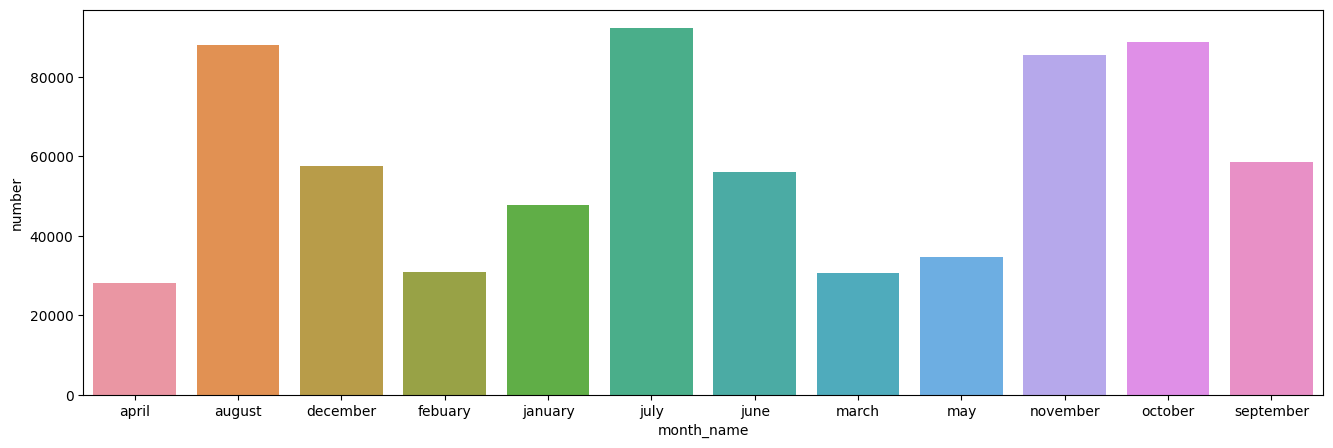

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_name',y='number',data=max_fire)


# In Which Year Maximum Number of Forest Fires Was Reported?

In [ ]:
max_fire_year = dataset1.groupby('year')['number'].sum().reset_index()
max_fire_year

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

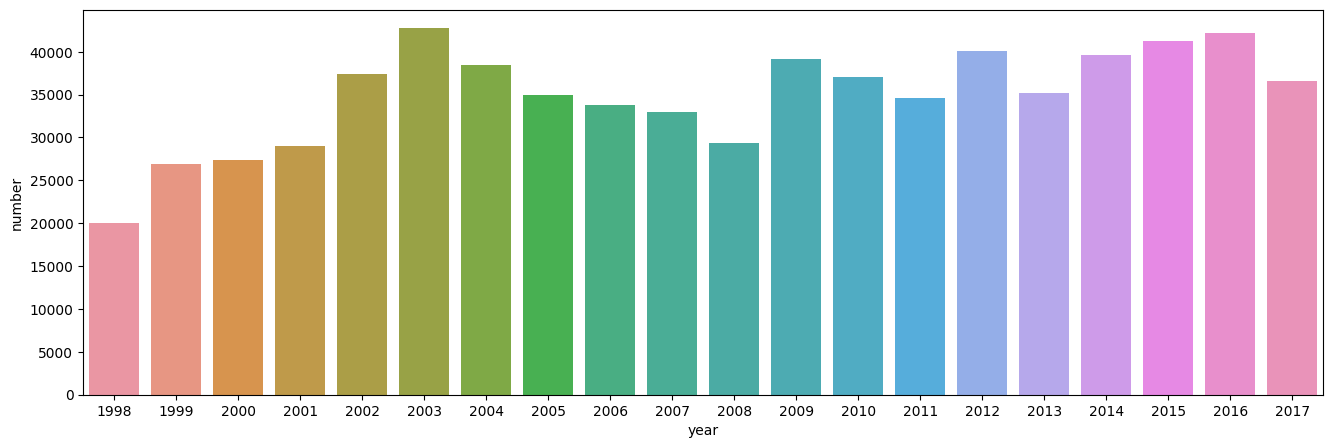

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=max_fire_year)

# In Which State Maximum Number of Forest Fires Was Reported?

In [ ]:
max_fire_state = dataset1.groupby('state')['number'].sum().reset_index()
max_fire_state

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<Axes: xlabel='state', ylabel='number'>

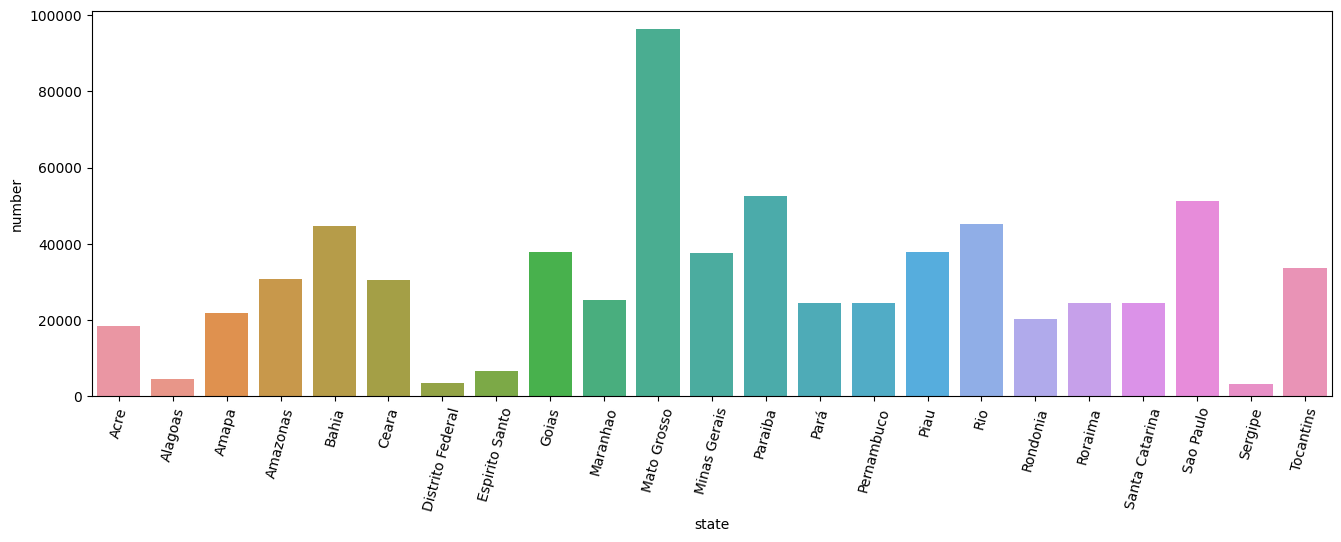

In [ ]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=75)
sns.barplot(x='state',y='number',data=max_fire_state)

#  Total Number of Fires Were Reported In Amazonas

In [ ]:
dataset1[dataset1['state'] == 'Amazonas']['number'].sum()

30650.129

# Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [ ]:
amazona = dataset1[dataset1['state'] == 'Amazonas']
amazona1 = amazona.groupby('year')['number'].sum().reset_index()
amazona1

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

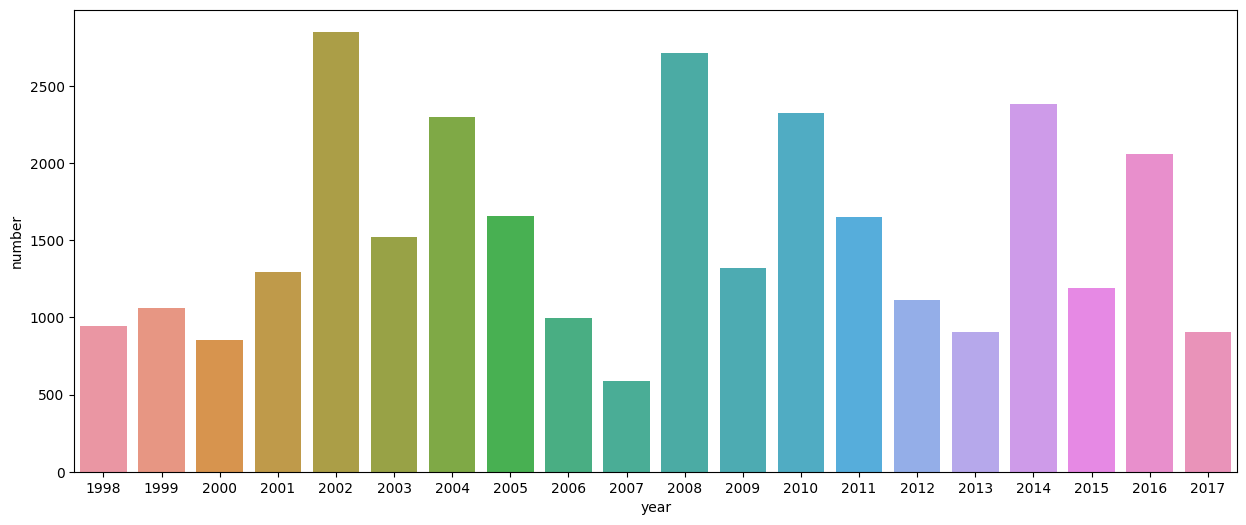

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='year',y='number',data=amazona1)

# Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [ ]:
amazona3 = dataset1[dataset1['state'] == 'Amazonas']
week = amazona3.groupby(amazona3['date'].dt.dayofweek).sum().number


<ipython-input-108-d2c6b2f48211>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week = amazona3.groupby(amazona3['date'].dt.dayofweek).sum().number


In [ ]:
import calendar
week.index = [calendar.day_name[x] for x in range(0,7)]

In [ ]:
week = week.reset_index()

<Axes: xlabel='index', ylabel='number'>

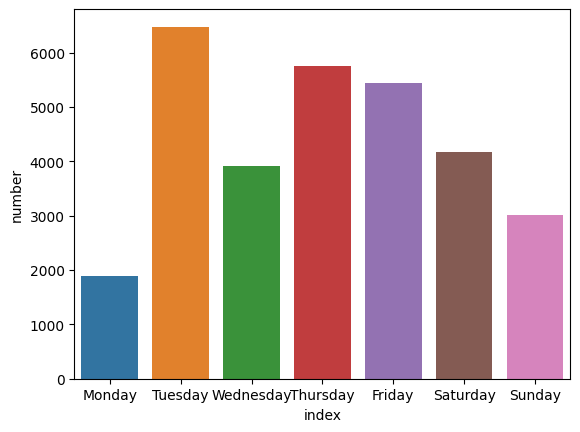

In [ ]:
sns.barplot(x='index',y='number',data=week)

# Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [ ]:
data3 = dataset1[dataset1['year']==2015]
fire = data3.groupby('month_name')['number'].sum().reset_index()


<Axes: xlabel='month_name', ylabel='number'>

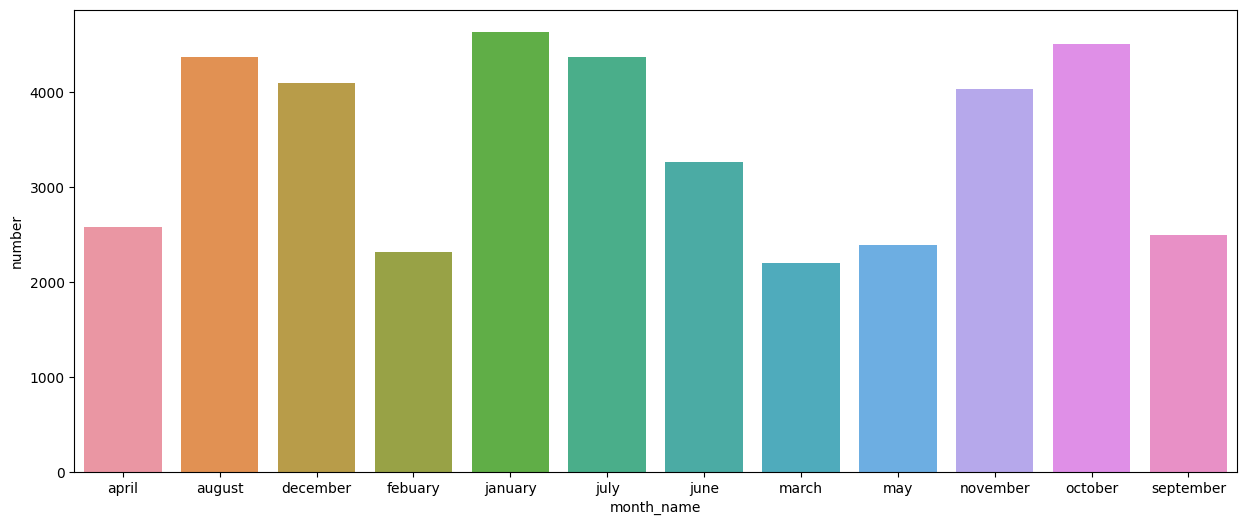

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='month_name',y='number',data=fire)

# Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [ ]:
state_avg = dataset1.groupby('state')['number'].mean().sort_values(ascending= False).reset_index()
state_avg

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


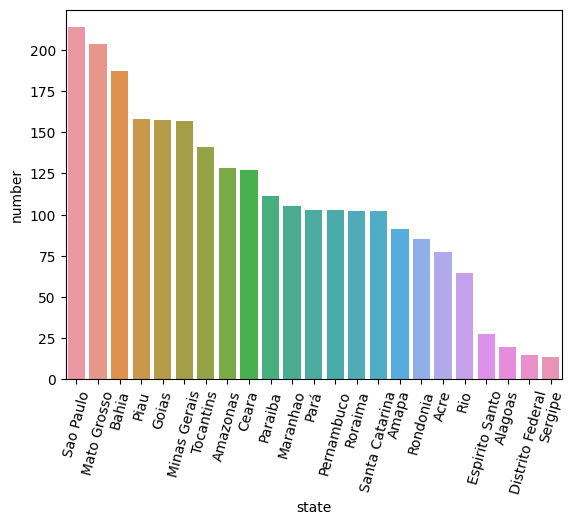

In [ ]:
sns.barplot(x='state',y='number',data=state_avg)
plt.xticks(rotation=75)
plt.show()

# To Find The State Names Where Fires Were Reported In 'dec' Month

In [ ]:
dataset1[dataset1['month_name']=='december']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)